In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy import stats
from mpl_toolkits.mplot3d import axes3d

$$ I = \int \int \int e^{\sqrt{x^{2}+y^{2}+z^{2}}}  dx dy dz = 4\pi(e-2) $$

$$ \{x^{2}+y^{2}+z^{2} \le 1 \} $$

$$ r,\theta,\phi  $$

In [22]:
def CreateSphere(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform( 0., 2*np.pi )
        theta = np.random.uniform( 0., np.pi )
        
        
        u = np.random.rand()
        
        r = R*u**(1./3.)
        
        X = np.append( X, r*np.cos(phi)*np.sin(theta) )
        Y = np.append( Y, r*np.sin(phi)*np.sin(theta) )
        Z = np.append( Z, r*np.cos(theta) )
        
    return X,Y,Z

In [25]:
Radio = 1.0
Npoints = 1000
data_sphere = CreateSphere(Npoints,Radio)
data_sphere = np.array(data_sphere)

#print(data_sphere)

<IPython.core.display.Javascript object>


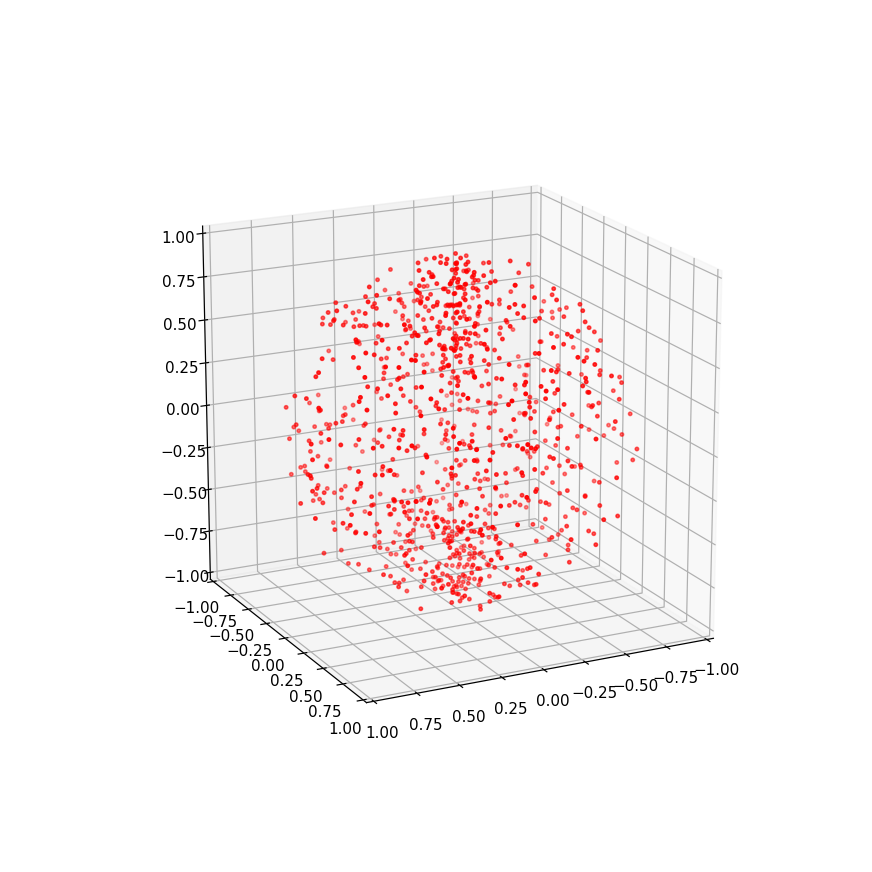

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(-Radio, Radio)
ax.set_ylim3d(-Radio, Radio)
ax.set_zlim3d(-Radio, Radio)

ax.view_init(10,60)
ax.scatter(data_sphere[0],data_sphere[1],data_sphere[2], color='r',marker='.')